In [24]:
# !pip install dtreeviz

In [25]:
import pandas as pd
import numpy as np

# import sklearn.datasets import load_boston

In [26]:
# Caminho alternativo para o dataset Boston House prices.
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
# url = "./dados/boston_housing.csv"
column_names = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]

data = pd.read_csv(url, header=None, delimiter=r"\s+", names=column_names)

# save the dataframe to a CSV file
data.to_csv("./dados/boston_housing.csv", index=False)
data.to_csv("./dados/boston_housing_bkp.csv", index=False)

In [27]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [28]:
# Ler e Converter sklearn dataset em pandas dataframe
df = pd.read_csv("./dados/boston_housing.csv")
# Cria nova coluna target
# rename specific column names
df.rename(columns={"MEDV": "price"}, inplace=True)
# Mostra as dimensões do dataset e as primeiras linhas
print("Dimensões do dataset: ", df.shape)
df.head()

Dimensões do dataset:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import dtreeviz
from dtreeviz.trees import *

# random_state = 1234  # get reproducible trees
# from sklearn.datasets import load_boston
features = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
]
target = "price"

X_train = df[features].values
y_train = df[target].values

regr = tree.DecisionTreeRegressor(max_depth=3)
regr = regr.fit(X_train, y_train)

viz = dtreeviz.model(regr, X_train, y_train, target_name=target, feature_names=features)

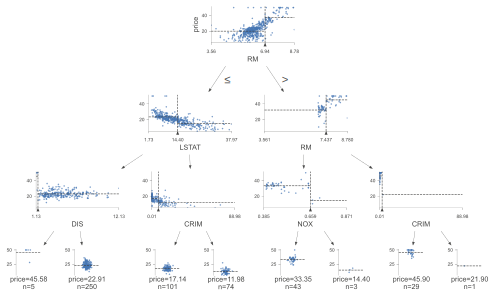

In [30]:
viz.view(scale=0.8)

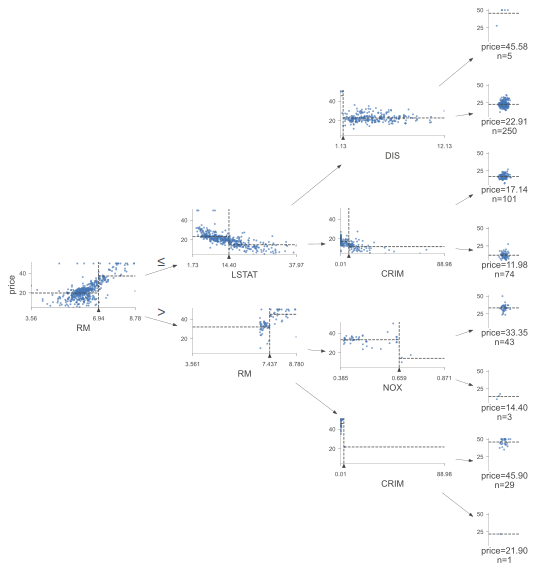

In [31]:
viz.view(orientation="LR")

In [32]:
from sklearn.datasets import load_wine
from dtreeviz.trees import *

clf = tree.DecisionTreeClassifier(max_depth=1)
wine = load_wine()

clf.fit(wine.data, wine.target)

testX = wine.data[np.random.randint(0, len(wine.data)), :]
testX = None

viz = dtreeviz.model(
    clf,
    wine.data,
    wine.target,
    target_name="wine",
    feature_names=wine.feature_names,
    class_names=list(wine.target_names),
)

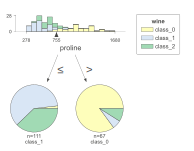

In [33]:
viz.view(scale=0.8)

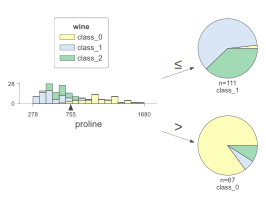

In [34]:
viz.view(orientation="LR")

# Single-var regression


In [35]:
# importando dataset no fortmato .data e transformando para .csv
import pandas as pd
from sklearn.model_selection import train_test_split

url = "./dados/cars.csv"

df_cars = pd.read_csv(url)

df_cars.to_csv("./dados/cars_bkp.csv", index=False)

In [36]:
df_cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [37]:
df_cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

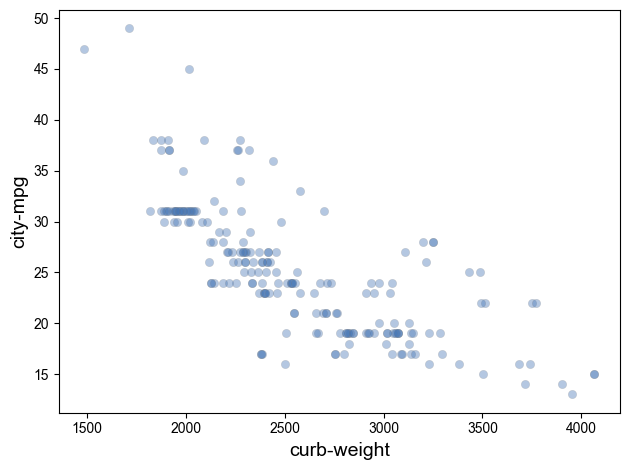

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_cars = pd.read_csv(url)

df_cars.rename(columns={"curb-weight": "WGT"}, inplace=True)
df_cars.rename(columns={"city-mpg'": "CMPG"}, inplace=True)

X = df_cars[['WGT']]
y = df_cars['city-mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from matplotlib import rcParams

rcParams["font.family"] = "Arial"
plt.scatter(X, y, marker="o", alpha=0.4, c="#4575b4", edgecolor="grey", lw=0.3)

plt.xlabel("curb-weight", fontsize=14)
plt.ylabel("city-mpg", fontsize=14)
plt.tight_layout()
#plt.savefig("/tmp/cars-wgt-vs-mpg.svg", bbox_inches=0, pad_inches=0)

In [39]:
# from dtreeviz.trees import rtreeviz
# rtreeviz(X_train, y_train, max_depth=2, feature_name='Vehicle Weight', target_name='MPG')

In [40]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))

0.5752344213650362


/Users/carlosroberto/Documentos/Projetos/.conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


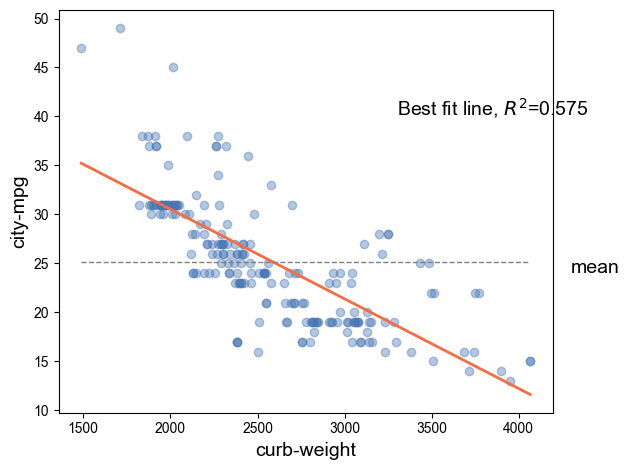

In [41]:
plt.scatter(X, y, marker="o", alpha=0.4, c="#4575b4")
overall_feature_range = (np.min(X.values), np.max(X.values))
X_line = np.arange(overall_feature_range[0], overall_feature_range[1], 1).reshape(-1, 1)
y_line = lm.predict(X_line)
plt.plot(X_line, y_line, color="#f46d43", lw=2)
plt.plot(
    overall_feature_range, [np.mean(y), np.mean(y)], "--", color="grey", linewidth=1
)
plt.text(3300, 40, f"Best fit line, $R^2$={lm.score(X_test,y_test):.3f}", fontsize=14)
plt.text(4300, 24, "mean", fontsize=14)
plt.xlabel("curb-weight", fontsize=14)
plt.ylabel("city-mpg", fontsize=14)
plt.tight_layout()
#plt.savefig("/tmp/linear-model.svg", bbox_inches=0, pad_inches=0)


In [42]:
depth = 4
t = tree.DecisionTreeRegressor(max_depth=depth)
t.fit(X_train, y_train)
t.score(X_test, y_test)

0.6839115122854627

In [43]:
# plt.xlabel("curb-weight", fontsize=14)
# plt.ylabel("city-mpg", fontsize=14)
viz = dtreeviz.model(t, X, y, target_name="city-mpg", feature_names=["curb-weight"])

/Users/carlosroberto/Documentos/Projetos/.conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


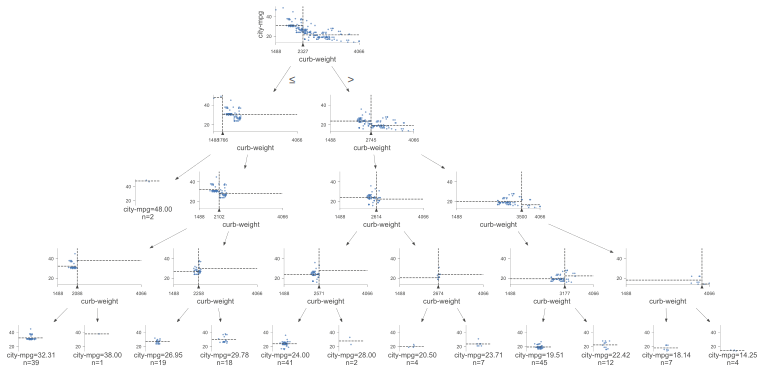

In [44]:
viz.view(scale=0.8)

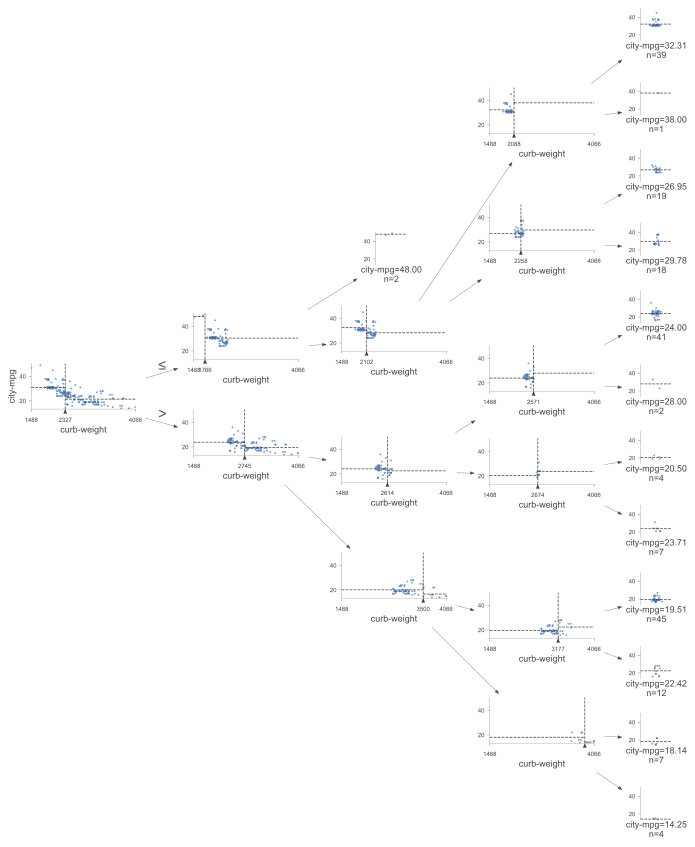

In [45]:
viz.view(orientation="LR")

In [46]:
y_range = (min(y), max(y))  # same y axis for all
overall_feature_range = (np.min(X.values), np.max(X.values))

shadow_tree = ShadowDecTree(t, X, y, feature_names=["WGT"])
splits = []
for node in shadow_tree.internal:
    splits.append(node.split())
splits = sorted(splits)
bins = [overall_feature_range[0]] + splits + [overall_feature_range[1]]
bins

TypeError: Can't instantiate abstract class ShadowDecTree with abstract methods classes, criterion, get_children_left, get_children_right, get_class_weight, get_class_weights, get_feature_path_importance, get_features, get_max_depth, get_min_samples_leaf, get_node_criterion, get_node_feature, get_node_nsamples, get_node_nsamples_by_class, get_node_samples, get_node_split, get_prediction, get_score, get_split_samples, get_thresholds, is_classifier, is_fit, nclasses, nnodes, shouldGoLeftAtSplit

In [ ]:
wgt = X.WGT
means = []
for i in range(len(bins) - 1):
    left = bins[i]
    right = bins[i + 1]
    inrange = y[(wgt >= left) & (wgt < right)]

    means.append(np.mean(inrange))
means

In [ ]:
plt.scatter(X, y, marker="o", alpha=0.4, c="#4575b4")

for split in splits:
    plt.plot([split, split], [*y_range], "--", color="grey", linewidth=0.7)

prevX = overall_feature_range[0]
for i, m in enumerate(means):
    split = overall_feature_range[1]
    if i < len(splits):
        split = splits[i]
    plt.plot([prevX, split], [m, m], "-", color="#f46d43", linewidth=2)
    prevX = split

plt.text(
    3090, 40, f"Decision tree model, $R^2$={t.score(X_test,y_test):.3f}", fontsize=14
)

plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")
plt.tight_layout()
plt.savefig(f"/tmp/dectree-depth-{depth}.svg", bbox_inches=0, pad_inches=0)

# Try single-var classification


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train = iris.data
y_train = iris.target
class_names = ["setosa", "versicolor", "virginica"]
petal_width = X_train[:, 3]
petal_width

figsize = (6, 1.5)
fig, ax = plt.subplots(1, 1, figsize=figsize)

max_depth = 2
ctreeviz_univar(
    ax,
    petal_width,
    y_train,
    max_depth=max_depth,
    feature_name="petal_width",
    class_names=["setosa", "versicolor", "virginica"],
    target_name="variety",
    gtype="strip",
    nbins=55,
)
plt.tight_layout()
plt.savefig(f"/tmp/iris-classtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)
plt.show()

In [ ]:
know = pd.read_csv("data/knowledge.csv")
class_names = ["very_low", "Low", "Middle", "High"]
know["UNS"] = know["UNS"].map({n: i for i, n in enumerate(class_names)})

max_depth = 3
x_train = know.PEG
y_train = know["UNS"]
figsize = (6, 1.5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ctreeviz_univar(
    ax,
    x_train,
    y_train,
    max_depth=max_depth,
    feature_name="PEG",
    target_name="variety",
    class_names=class_names,
    nbins=40,
    gtype="strip",
)
plt.tight_layout()
plt.savefig(
    f"/tmp/knowlege-classtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0
)
plt.show()

In [ ]:
import numpy as np

x = np.arange(1, 5)
y = np.arange(1, 5)
print(x, y)
print()
X, Y = np.meshgrid(x, y)
print(X)
print()
print(Y)

R = np.sqrt(X**2 + Y**2)

print()
print(R)

In [ ]:
from colour import Color

colors = list(Color("red").range_to(Color("green"), 100))
i = int(round(20.3))
c = colors[i]
str(c)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

point2 = np.array([10, 50, 50])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))

# calculate corresponding z
z = np.zeros_like(xx)

# plot the surface
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(xx, yy, z, alpha=0.4)

xx, yy = np.meshgrid(np.linspace(4, 6, 10), np.linspace(4, 6, 10))
z = np.ones_like(xx)
plt3d.plot_surface(xx, yy, z, alpha=0.4)

plt.show()

In [ ]:
def plane(node, bbox):
    x = np.linspace(bbox[0], bbox[2], 10)
    y = np.linspace(bbox[1], bbox[3], 10)
    xx, yy = np.meshgrid(x, y)
    z = np.zeros_like(xx)
    z[:, :] = node.prediction()
    ax.plot_surface(xx, yy, z, alpha=1)


df_cars = pd.read_csv("data/cars.csv")
X = df_cars.drop("MPG", axis=1)
y = df_cars["MPG"]

feature_names = ["A", "B"]
features = [2, 1]
fig = plt.figure()
ax = fig.gca(projection="3d")

max_depth = 2
X = X.iloc[:, features]  # use just these features
rt = tree.DecisionTreeRegressor(max_depth=max_depth)
rt.fit(X, y)

y_lim = np.min(y), np.max(y)
y_range = y_lim[1] - y_lim[0]
# color_map = list(str(c) for c in Color("red").range_to(Color("green"), 100))

shadow_tree = ShadowDecTree(rt, X, y, feature_names=feature_names)

tessellation = shadow_tree.tessellation()
for node, bbox in tessellation:
    plane(node, bbox)

x, y, z = X.values[:, 0], X.values[:, 1], y
xx, yy = np.meshgrid(x, y)
ax.scatter(x, y, z, marker="o", alpha=0.7, edgecolor=GREY, lw=0.3)

plt.show()

In [ ]:
x = [0, 3, 2]
y = [0, 4, 5]
plt.fill(x, y, c="blue", alpha=0.5, edgecolor="grey", lw=0.3)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)

iris = load_iris()
X_train = iris.data
y_train = iris.target
class_names = ["setosa", "versicolor", "virginica"]
x_train = X_train[:, 3]
feature_name = "petal width"
fontsize = 12

ct = tree.DecisionTreeClassifier(max_depth=max_depth)
ct.fit(x_train.reshape(-1, 1), y_train)

shadow_tree = ShadowDecTree(
    ct,
    x_train.reshape(-1, 1),
    y_train,
    feature_names=[feature_name],
    class_names=class_names,
)

n_classes = shadow_tree.nclasses()
overall_feature_range = (np.min(x_train), np.max(x_train))
class_values = shadow_tree.unique_target_values

color_values = color_blind_friendly_colors[n_classes]
colors = {v: color_values[i] for i, v in enumerate(class_values)}
X_colors = [colors[cl] for cl in class_values]

ax.set_xlabel(f"{feature_name}", fontsize=fontsize, fontname="Arial", color=GREY)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_linewidth(0.3)

r = overall_feature_range[1] - overall_feature_range[0]

dot_w = 25

X_hist = [x_train[y_train == cl] for cl in class_values]
# user should pass in short and wide fig
sigma = 0.02
mu = 0.1
class_step = 0.12
ax.set_ylim(0, mu + n_classes * class_step)
for i, h in enumerate(X_hist):
    y_noise = np.random.normal(mu + i * class_step, sigma, size=len(h))
    ax.scatter(
        h, y_noise, alpha=0.7, marker="o", s=dot_w, c=colors[i], edgecolors=GREY, lw=0.3
    )

ax.tick_params(
    axis="both", which="major", width=0.3, labelcolor=GREY, labelsize=fontsize
)
plt.show()

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import dtreeviz

x = np.random.choice([-1, 1], size=(100, 2))
y = np.random.choice([0, 1], size=100)

dtreeviz(
    tree_model=DecisionTreeClassifier(max_depth=1).fit(x, y),
    X_train=x,
    y_train=y,
    feature_names=["a", "b"],
    target_name="y",
    class_names=[1, 0],
)